## 🟧 Análise por Categoria

Nesta seção, vamos explorar o desempenho das vendas em cada categoria de produto, buscando identificar quais categorias são responsáveis pelo maior volume de vendas, faturamento e relevância para o negócio.

---


### Por que analisar o lucro e a quantidade vendida por categoria?

Analisar o lucro por categoria ajuda a entender *quais produtos realmente trazem dinheiro para a empresa*.  
Assim, a loja pode:

- Focar nas categorias que *mais geram lucro*.
- Repensar ou melhorar as categorias que *dão pouco retorno*.
- *Planejar melhor o estoque e as campanhas*.
- Evitar investir em produtos que *vendem muito, mas lucram pouco*.

Isso garante que o e-commerce *cresça de forma inteligente e lucrativa*.


Já analisar a quantidade mostra *quais tipos de produtos vendem mais*.  
Isso ajuda a loja a:

- *Organizar o estoque*.
- *Oferecer o que os clientes mais compram*.
- *Planejar promoções e reposições com mais segurança*

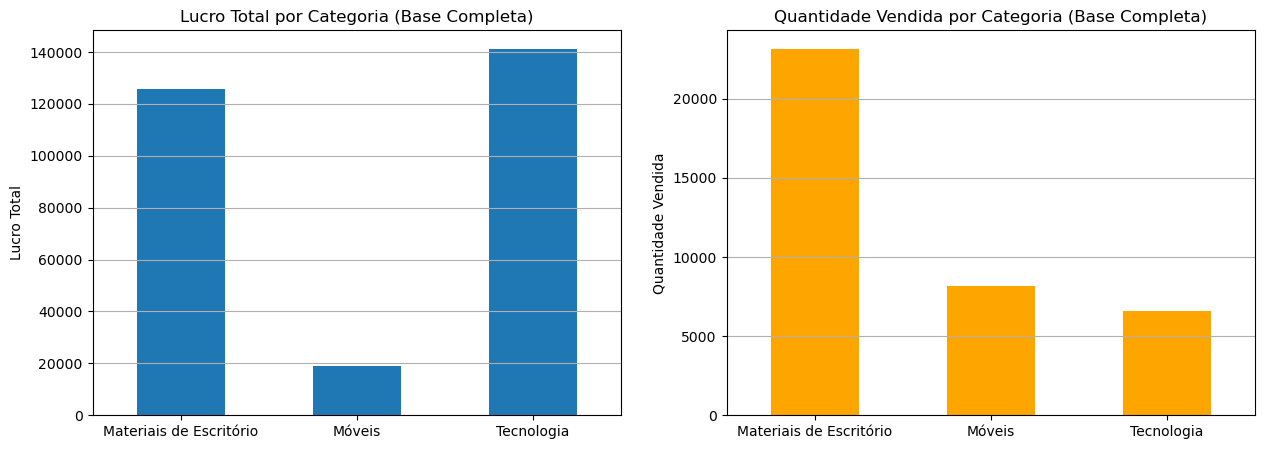

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir o caminho do arquivo e a aba única da base limpa
file_path = "dados_amr.xlsx"
sheet_name = "Base_Limpa"

# Carregar a planilha da base limpa
df_cat = pd.read_excel(file_path, sheet_name=sheet_name)

# Agrupar por categoria e calcular a soma do lucro
resumo = df_cat.groupby('categoria').agg({'lucro': 'sum'})

plt.figure(figsize=(15,5))

# Gerar o gráfico de barras para o lucro por categoria
plt.subplot(1,2,1)
resumo['lucro'].plot(kind='bar')
plt.title('Lucro Total por Categoria (Base Completa)')
plt.ylabel('Lucro Total')
plt.xlabel('')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Agrupar por categoria e calcular a soma da quantidade
resumo = df_cat.groupby('categoria').agg({'quantidade': 'sum'})

# Gerar o gráfico de barras para a quantidade por categoria
plt.subplot(1,2,2)
resumo['quantidade'].plot(kind='bar', color='orange')
plt.title('Quantidade Vendida por Categoria (Base Completa)')
plt.ylabel('Quantidade Vendida')
plt.xlabel('')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

### Analisando a quantidade de pedidos com e sem desconto por categoria

Este gráfico mostra *quantos pedidos foram feitos com e sem desconto em cada categoria*.

Com ele, a loja consegue:

- Ver *quais categorias dependem mais de descontos* para vender.
- *Evitar dar descontos em produtos que já vendem bem sem desconto*.
- *Planejar promoções* de forma mais inteligente.

Assim, é possível *aumentar as vendas sem prejudicar o lucro*.

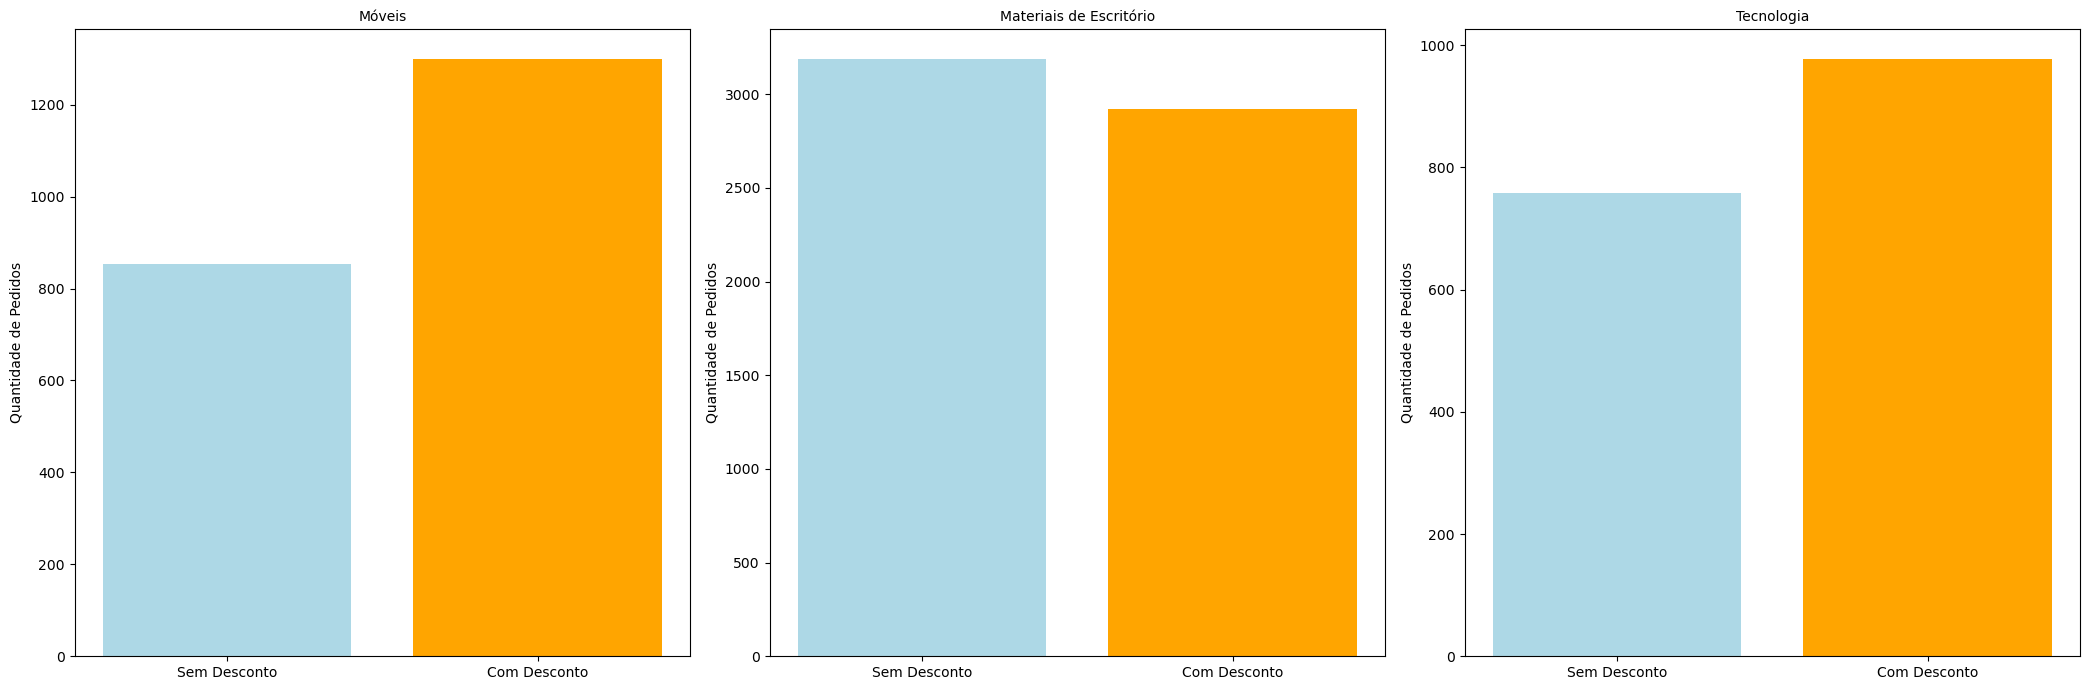

In [ ]:
# Lista de categorias disponíveis no DataFrame
categorias = df_cat['categoria'].unique()

# Criar a figura
plt.figure(figsize=(21, 7))

# Loop para gerar os subplots
for i, categoria in enumerate(categorias, start=1):
    df_categoria = df_cat[df_cat['categoria'] == categoria]
    total_pedidos = len(df_categoria)
    pedidos_com_desconto = len(df_categoria[df_categoria['desconto'] > 0])
    pedidos_sem_desconto = total_pedidos - pedidos_com_desconto

    plt.subplot(1, 3, i)
    plt.bar(['Sem Desconto', 'Com Desconto'],[pedidos_sem_desconto, pedidos_com_desconto],color=['lightblue', 'orange'])
    plt.title(f'{categoria}', fontsize=10)
    plt.ylabel('Quantidade de Pedidos')
    plt.xlabel('')

# Ajustar o layout
plt.tight_layout()
plt.show()


### Por que comparar o lucro médio com e sem desconto?

Essa análise mostra *se os descontos estão realmente ajudando a loja a lucrar mais*.  
Com ela, é possível:

- Ver se o *lucro cai muito ao dar desconto*.
- Identificar *categorias que vendem bem mesmo sem desconto*.
- Melhorar a *estratégia de promoções e preços*.

Assim, a loja consegue *equilibrar vendas e rentabilidade*.

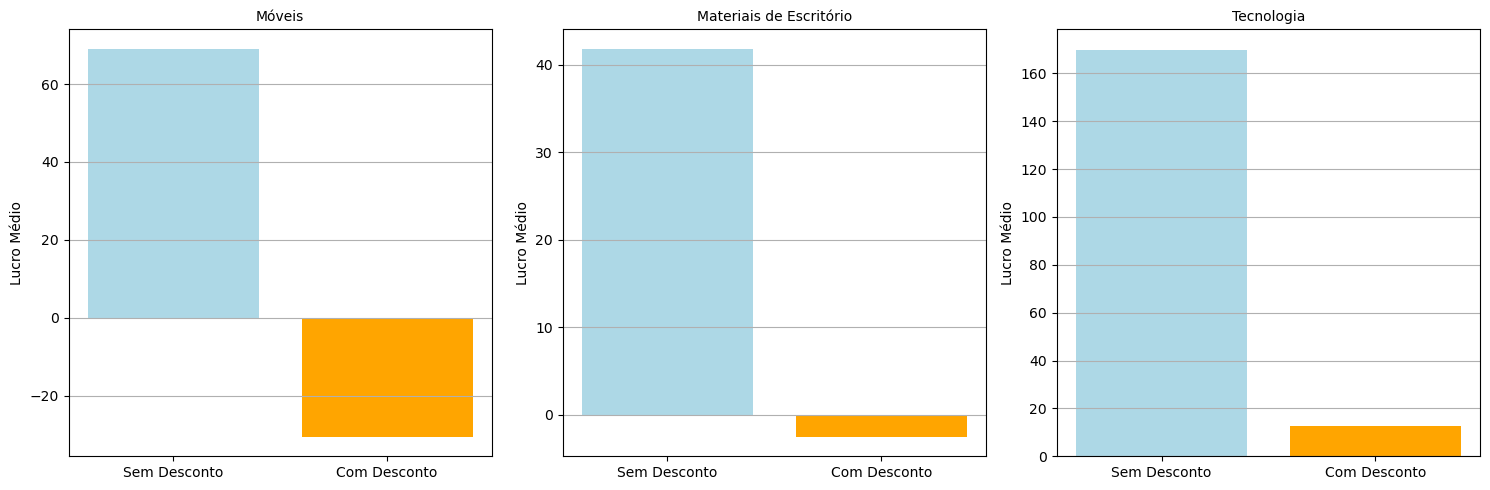

In [ ]:
resultados = []

# Processar cada categoria da base inteira
for categoria in df_cat['categoria'].unique():
    df_categoria = df_cat[df_cat['categoria'] == categoria]

    # Filtrar pedidos com e sem desconto
    com_desc = df_categoria[df_categoria['desconto'] > 0]
    sem_desc = df_categoria[df_categoria['desconto'] == 0]

    # Calcular lucro médio
    lucro_medio_com = com_desc['lucro'].mean() if not com_desc.empty else 0
    lucro_medio_sem = sem_desc['lucro'].mean() if not sem_desc.empty else 0

    resultados.append({'Categoria': categoria,'Com Desconto': lucro_medio_com,'Sem Desconto': lucro_medio_sem})

# Converter para DataFrame
df_resultados = pd.DataFrame(resultados)

# Criar figura
plt.figure(figsize=(15, 5))

# Loop por categoria com subplot horizontal
for i, row in enumerate(df_resultados.itertuples(), start=1):
    plt.subplot(1, 3, i)  # 1 linha, 3 colunas, posição i
    plt.bar(['Sem Desconto', 'Com Desconto'], [row._3, row._2], color=['lightblue', 'orange'])
    plt.title(f'{row.Categoria}', fontsize=10)
    plt.ylabel('Lucro Médio')
    plt.xlabel('')
    plt.grid(axis='y')

plt.tight_layout()
plt.show()


### Vendas por segmento em cada região

Este gráfico mostra *quais segmentos vendem mais em cada região*.

Essa informação é útil para:

- *Focar os esforços de vendas* em cada região no segmento certo.
- *Entender o comportamento dos clientes por região*.
- *Planejar estoque e campanhas regionais* com mais precisão.

Assim, a loja consegue *atender melhor cada público e vender mais em cada região*.

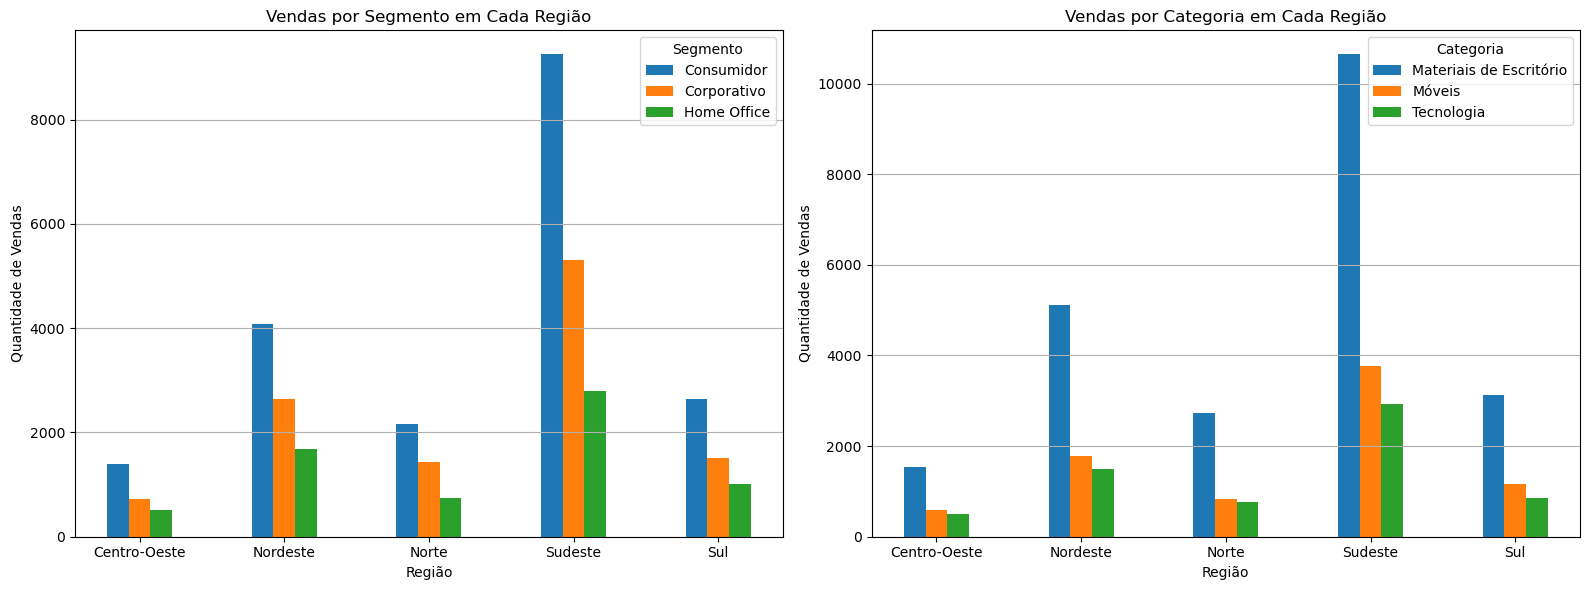

In [30]:
# Agrupar por região e segmento e somar as quantidades
resumo_segs = df_cat.groupby(['região', 'segmento'])['quantidade'].sum().unstack()

# Agrupar por região e categoria e somar as quantidades
resumo_cats = df_cat.groupby(['região', 'categoria'])['quantidade'].sum().unstack()

# Criar figura
plt.figure(figsize=(16, 6))

# ---------- SUBPLOT 1: Segmentos ----------
plt.subplot(1, 2, 1)
x = range(len(resumo_segs.index))
largura_barra = 0.15
for i, col in enumerate(resumo_segs.columns):
    deslocamento = [xi + i * largura_barra for xi in x]
    plt.bar(deslocamento, resumo_segs[col], width=largura_barra, label=col)

centros = [xi + (largura_barra * (len(resumo_segs.columns)-1)) / 2 for xi in x]
plt.xticks(centros, resumo_segs.index, rotation=0)
plt.title('Vendas por Segmento em Cada Região')
plt.xlabel('Região')
plt.ylabel('Quantidade de Vendas')
plt.legend(title='Segmento')
plt.grid(axis='y')

# ---------- SUBPLOT 2: Categorias ----------
plt.subplot(1, 2, 2)
x = range(len(resumo_cats.index))
largura_barra = 0.15
for i, col in enumerate(resumo_cats.columns):
    deslocamento = [xi + i * largura_barra for xi in x]
    plt.bar(deslocamento, resumo_cats[col], width=largura_barra, label=col)

centros = [xi + (largura_barra * (len(resumo_cats.columns)-1)) / 2 for xi in x]
plt.xticks(centros, resumo_cats.index, rotation=0)
plt.title('Vendas por Categoria em Cada Região')
plt.xlabel('Região')
plt.ylabel('Quantidade de Vendas')
plt.legend(title='Categoria')
plt.grid(axis='y')

# Ajustar layout final
plt.tight_layout()
plt.show()